# Data Loading and Cleaning

Loads and examines the initial structure of the datasets required.

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Load Data
# df_adjusted = pd.read_csv('../data/combined_data_season_adjusted.csv')
# df_not_adjusted = pd.read_csv('../data/combined_data_season_not_adjusted.csv')
# categories = pd.read_csv('../data/code_categories.csv')

In [3]:
# Load Data
df_adjusted = pd.read_csv('../data/MRTS_adjusted.csv')
df_not_adjusted = pd.read_csv('../data/MRTS_not_adjusted.csv')
categories = pd.read_csv('../data/mrts_code_categories.csv')

- **`df_adjusted` (*combined_data_season_adjusted*)**: Contains the main dataset with seasonally adjusted sales data for retail and food services from 2017–2023.
- 
**`df_not_adjusted` (*combined_data_season_not_adjusted*)**: Contains the main dataset with raw sales data for retail and food services from 2017–2023.
  
- **`categories` (*code_categories*)**: Provides a mapping of category codes to descriptive names, enabling a better understanding of each retail and food service segment.


In [4]:
df_adjusted.head()

,cell_value,time_slot_id,data_type_code,category_code,error_data,seasonally_adj,data_type_code.1,time,us
0,91596,0,SM,441X,no,yes,SM,2017-01,1
1,91088,0,SM,441X,no,yes,SM,2017-02,1
2,89067,0,SM,441X,no,yes,SM,2017-03,1
3,89571,0,SM,441X,no,yes,SM,2017-04,1
4,90043,0,SM,441X,no,yes,SM,2017-05,1


In [5]:
df_not_adjusted.head()

,cell_value,time_slot_id,data_type_code,category_code,error_data,seasonally_adj,data_type_code.1,time,us
0,74647,0,SM,4411,no,no,SM,2017-01,1
1,77728,0,SM,4411,no,no,SM,2017-02,1
2,91143,0,SM,4411,no,no,SM,2017-03,1
3,82286,0,SM,4411,no,no,SM,2017-04,1
4,89634,0,SM,4411,no,no,SM,2017-05,1


In [6]:
categories.head()

,category_code,category_name,high_level_category
0,44X72,Retail Trade and Food Services,Broad Retail and Food Services
1,44Y72,"Retail Trade and Food Services, ex Auto",Broad Retail and Food Services
2,44Z72,"Retail Trade and Food Services, ex Gas",Broad Retail and Food Services
3,44W72,"Retail Trade and Food Services, ex Auto and Gas",Broad Retail and Food Services
4,44000,Retail Trade,Broad Retail and Food Services


In [7]:
df_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cell_value        3192 non-null   object
 1   time_slot_id      3192 non-null   int64 
 2   data_type_code    3192 non-null   object
 3   category_code     3192 non-null   object
 4   error_data        3192 non-null   object
 5   seasonally_adj    3192 non-null   object
 6   data_type_code.1  3192 non-null   object
 7   time              3192 non-null   object
 8   us                3192 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 224.6+ KB


In [8]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category_code        65 non-null     object
 1   category_name        65 non-null     object
 2   high_level_category  65 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [9]:
df_adjusted.columns

Index(['cell_value', 'time_slot_id', 'data_type_code', 'category_code',
       'error_data', 'seasonally_adj', 'data_type_code.1', 'time', 'us'],
      dtype='object')

In [10]:
pd.options.display.float_format = '{:.2f}'.format

As the dataset contains no `null` values, we proceed to examine the unique values in each column to understand the variability and structure of the data.

In [11]:
for column in df_adjusted.columns:
    print(f"Column: {column}")
    print(f"Unique values: {df_adjusted[column].unique()}")
    print(f"Number of unique values: {df_adjusted[column].nunique()}\n")

Column: cell_value
Unique values: ['91596' '91088' '89067' ... '28784' '2528' '2737']
Number of unique values: 3044

Column: time_slot_id
Unique values: [0]
Number of unique values: 1

Column: data_type_code
Unique values: ['SM']
Number of unique values: 1

Column: category_code
Unique values: ['441X' '4400A' '4413' '4400C' '44000' '441' '4423X' '444' '4441' '4451'
 '442' '446' '443' '445' '4453' '4481' '44812' '44811' '44611' '448' '447'
 '722' '451' '44W72' '45291' '452' '44Y72' '45299' '44X72' '454' '453'
 '4541' '4482' '44831' '4521E' '45431' '44Z72' '4529']
Number of unique values: 38

Column: error_data
Unique values: ['no']
Number of unique values: 1

Column: seasonally_adj
Unique values: ['yes']
Number of unique values: 1

Column: data_type_code.1
Unique values: ['SM']
Number of unique values: 1

Column: time
Unique values: ['2017-01' '2017-02' '2017-03' '2017-04' '2017-05' '2017-06' '2017-07'
 '2017-08' '2017-09' '2017-10' '2017-11' '2017-12' '2018-01' '2018-02'
 '2018-03' '20

Convert data types to appropriate types

 - `time` to `Datetime` format for easier analysis.

In [12]:
df_adjusted['time'] = pd.to_datetime(df_adjusted['time'], format='%Y-%m')
df_not_adjusted['time'] = pd.to_datetime(df_not_adjusted['time'], format='%Y-%m')
df_adjusted = df_adjusted.sort_values(by='time', ascending=True)
df_not_adjusted = df_not_adjusted.sort_values(by='time', ascending=True)

- `cell_value`'s type `string` to `integer` so it represents monthly sales

In [13]:
df_adjusted["monthly_sales"] = pd.to_numeric(df_adjusted["cell_value"], errors='coerce')  # Convert to numeric, invalid values become NaN
df_not_adjusted["monthly_sales"] = pd.to_numeric(df_not_adjusted["cell_value"], errors='coerce')  
non_convertible_values = df_adjusted[df_adjusted["monthly_sales"].isna()]["cell_value"].unique() + df_adjusted[df_adjusted["monthly_sales"].isna()]["cell_value"].unique()

print("Adjusted Non-convertible values:", non_convertible_values, "Not Adjusted Non-convertible values:", non_convertible_values)

Adjusted Non-convertible values: ['(S)(S)'] Not Adjusted Non-convertible values: ['(S)(S)']


Since `(S)` values are suppressed, we will keep this as `null`

Rename column names for better interpretation.

In [14]:
df_adjusted = df_adjusted.rename(columns={'seasonally_adj': 'seasonally_adjusted'})
df_not_adjusted = df_not_adjusted.rename(columns={'seasonally_adj': 'seasonally_adjusted'})
df_adjusted['seasonally_adjusted'] = df_adjusted['seasonally_adjusted'].map({'yes': True, 'no': False})
df_not_adjusted['seasonally_adjusted'] = df_not_adjusted['seasonally_adjusted'].map({'yes': True, 'no': False})

In [15]:
df_not_adjusted ## MY CHECK

,cell_value,time_slot_id,data_type_code,category_code,error_data,seasonally_adjusted,data_type_code.1,time,us,monthly_sales
0,74647,0,SM,4411,no,False,SM,2017-01-01,1,74647.00
490,45834,0,SM,454,no,False,SM,2017-01-01,1,45834.00
496,336767,0,SM,44Y72,no,False,SM,2017-01-01,1,336767.00
170,1462,0,SM,44221,no,False,SM,2017-01-01,1,1462.00
518,2148,0,SM,4482,no,False,SM,2017-01-01,1,2148.00
...,...,...,...,...,...,...,...,...,...,...
4884,74366,0,SM,44511,no,False,SM,2023-12-01,1,74366.00
5332,586979,0,SM,44W72,no,False,SM,2023-12-01,1,586979.00
5121,92667,0,SM,452,no,False,SM,2023-12-01,1,92667.00
4472,3354,0,SM,44413,no,False,SM,2023-12-01,1,3354.00


In [16]:
df_adjusted ## MY CHECK

,cell_value,time_slot_id,data_type_code,category_code,error_data,seasonally_adjusted,data_type_code.1,time,us,monthly_sales
0,91596,0,SM,441X,no,True,SM,2017-01-01,1,91596.00
144,59565,0,SM,445,no,True,SM,2017-01-01,1,59565.00
330,473019,0,SM,44X72,no,True,SM,2017-01-01,1,473019.00
293,57644,0,SM,452,no,True,SM,2017-01-01,1,57644.00
257,7216,0,SM,451,no,True,SM,2017-01-01,1,7216.00
...,...,...,...,...,...,...,...,...,...,...
3092,8364,0,SM,451,no,True,SM,2023-12-01,1,8364.00
3116,54725,0,SM,45291,no,True,SM,2023-12-01,1,54725.00
2822,18561,0,SM,4423X,no,True,SM,2023-12-01,1,18561.00
3043,3153,0,SM,44812,no,True,SM,2023-12-01,1,3153.00


Proceed to drop unnecessary columns.

In [17]:
df_adjusted = df_adjusted.drop(columns=['time_slot_id', 'us','data_type_code', 'data_type_code.1', 'cell_value', 'error_data'])
df_not_adjusted = df_not_adjusted.drop(columns=['time_slot_id', 'us','data_type_code', 'data_type_code.1', 'cell_value', 'error_data'])

Merge the main dataset with a mapping dataset (categories) using the `category_code` column. 

This step assigns descriptive names to each `category_code`, making the dataset more interpretable.

In [18]:
df_adjusted = df_adjusted.merge(categories, on='category_code', how='left')
df_not_adjusted = df_not_adjusted.merge(categories, on='category_code', how='left')

In [19]:
df_adjusted.head()

,category_code,seasonally_adjusted,time,monthly_sales,category_name,high_level_category
0,441X,True,2017-01-01,91596.00,Auto and Other Motor Vehicles,Motor Vehicles and Parts
1,445,True,2017-01-01,59565.00,Food and Beverage Stores,Food and Beverage
2,44X72,True,2017-01-01,473019.00,Retail Trade and Food Services,Broad Retail and Food Services
3,452,True,2017-01-01,57644.00,General Merchandise Stores,General Merchandise
4,451,True,2017-01-01,7216.00,"Sporting Goods, Hobby, Musical Instrument, and...",Sporting Goods and Hobby


In [20]:
output_directory = "../data/"

# Export DataFrames to CSV files
# sm_df_adjusted.to_csv(f"{output_directory}sm_df_adjusted.csv", index=False)
# esm_df_adjusted.to_csv(f"{output_directory}esm_df_adjusted.csv", index=False)
# sm_df_not_adjusted.to_csv(f"{output_directory}sm_df_not_adjusted.csv", index=False)
# esm_df_not_adjusted.to_csv(f"{output_directory}esm_df_not_adjusted.csv", index=False)

# Visualizations

In [21]:
df_adjusted[df_adjusted['category_name'] == 'GAFO'] #MY CHECK

,category_code,seasonally_adjusted,time,monthly_sales,category_name,high_level_category
6,4400C,True,2017-01-01,106672.00,GAFO,Broad Retail and Food Services
72,4400C,True,2017-02-01,105441.00,GAFO,Broad Retail and Food Services
80,4400C,True,2017-03-01,106088.00,GAFO,Broad Retail and Food Services
150,4400C,True,2017-04-01,106155.00,GAFO,Broad Retail and Food Services
169,4400C,True,2017-05-01,104844.00,GAFO,Broad Retail and Food Services
...,...,...,...,...,...,...
3035,4400C,True,2023-08-01,129850.00,GAFO,Broad Retail and Food Services
3076,4400C,True,2023-09-01,129525.00,GAFO,Broad Retail and Food Services
3095,4400C,True,2023-10-01,129095.00,GAFO,Broad Retail and Food Services
3129,4400C,True,2023-11-01,129255.00,GAFO,Broad Retail and Food Services


In [22]:
sales_trends = df_adjusted.copy()
sales_trends['year'] = df_adjusted['time'].dt.year
yearly_sales_avg = sales_trends.groupby(['year', 'category_name'])['monthly_sales'].mean().reset_index()
yearly_sales_sum = sales_trends.groupby(['year', 'category_name'])['monthly_sales'].sum().reset_index()
yearly_sales_sum['yoy_percentage'] = yearly_sales_sum.groupby('category_name')['monthly_sales'].pct_change() * 100
sales_avg = sales_trends.groupby(['category_name'])['monthly_sales'].mean().reset_index()
sales_sum = sales_trends.groupby(['category_name'])['monthly_sales'].sum().reset_index()

In [23]:
yearly_sales_sum

,year,category_name,monthly_sales,yoy_percentage
0,2017,All Other General Merchandise Stores,75064.00,NaN
1,2017,Auto and Other Motor Vehicles,1094315.00,NaN
2,2017,"Automotive Parts, Accessories, and Tire Stores",93643.00,NaN
3,2017,"Beer, Wine, and Liquor Stores",52671.00,NaN
4,2017,Building Material and Garden Equipment and Sup...,349987.00,NaN
...,...,...,...,...
261,2023,"Retail Trade, ex Auto",5627256.00,1.95
262,2023,Shoe Stores,40077.00,0.36
263,2023,"Sporting Goods, Hobby, Musical Instrument, and...",102465.00,-0.30
264,2023,Warehouse Clubs and Superstores,646706.00,3.43


In [24]:
sales_avg = sales_avg.sort_values(by=['monthly_sales'], ascending=False)
sales_avg

,category_name,monthly_sales
29,Retail Trade and Food Services,569020.50
32,"Retail Trade and Food Services, ex Gas",522556.42
28,Retail Trade,500321.48
30,"Retail Trade and Food Services, ex Auto",456869.10
31,"Retail Trade and Food Services, ex Auto and Gas",410405.01
33,"Retail Trade, ex Auto",388170.07
16,GAFO,114879.27
24,Motor Vehicle and Parts Dealers,112151.40
1,Auto and Other Motor Vehicles,103182.94
25,Nonstore Retailers,80068.57


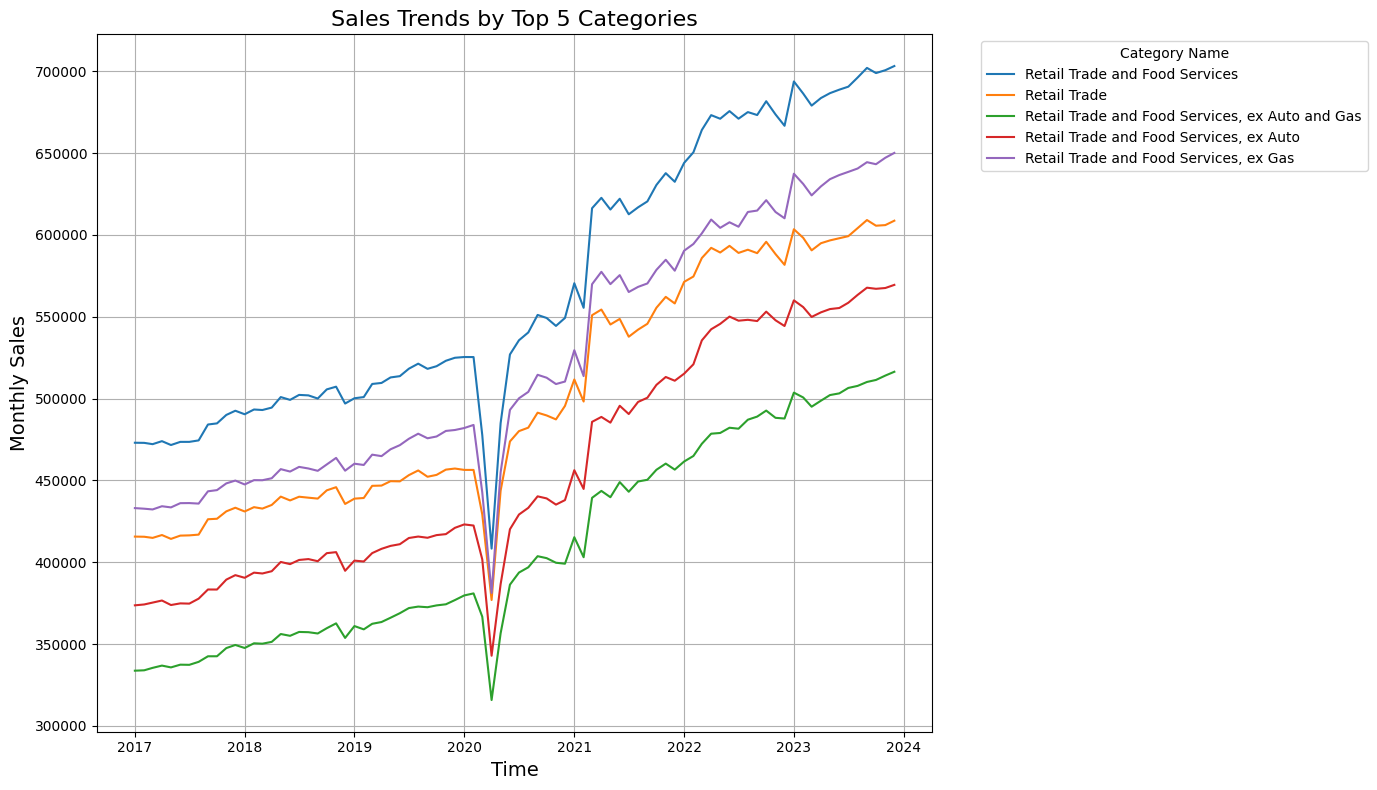

In [25]:
top_categories = sales_avg['category_name'].head(5)
sales_trends_top = sales_trends[sales_trends['category_name'].isin(top_categories)]

plt.figure(figsize=(14, 8))

for category in sales_trends_top['category_name'].unique():
    category_data = sales_trends_top[sales_trends_top['category_name'] == category]
    plt.plot(category_data['time'], category_data['monthly_sales'], label=category)

# Add titles and labels
plt.title('Sales Trends by Top 5 Categories', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Monthly Sales', fontsize=14)
plt.legend(title='Category Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True)
plt.tight_layout()

plt.show()


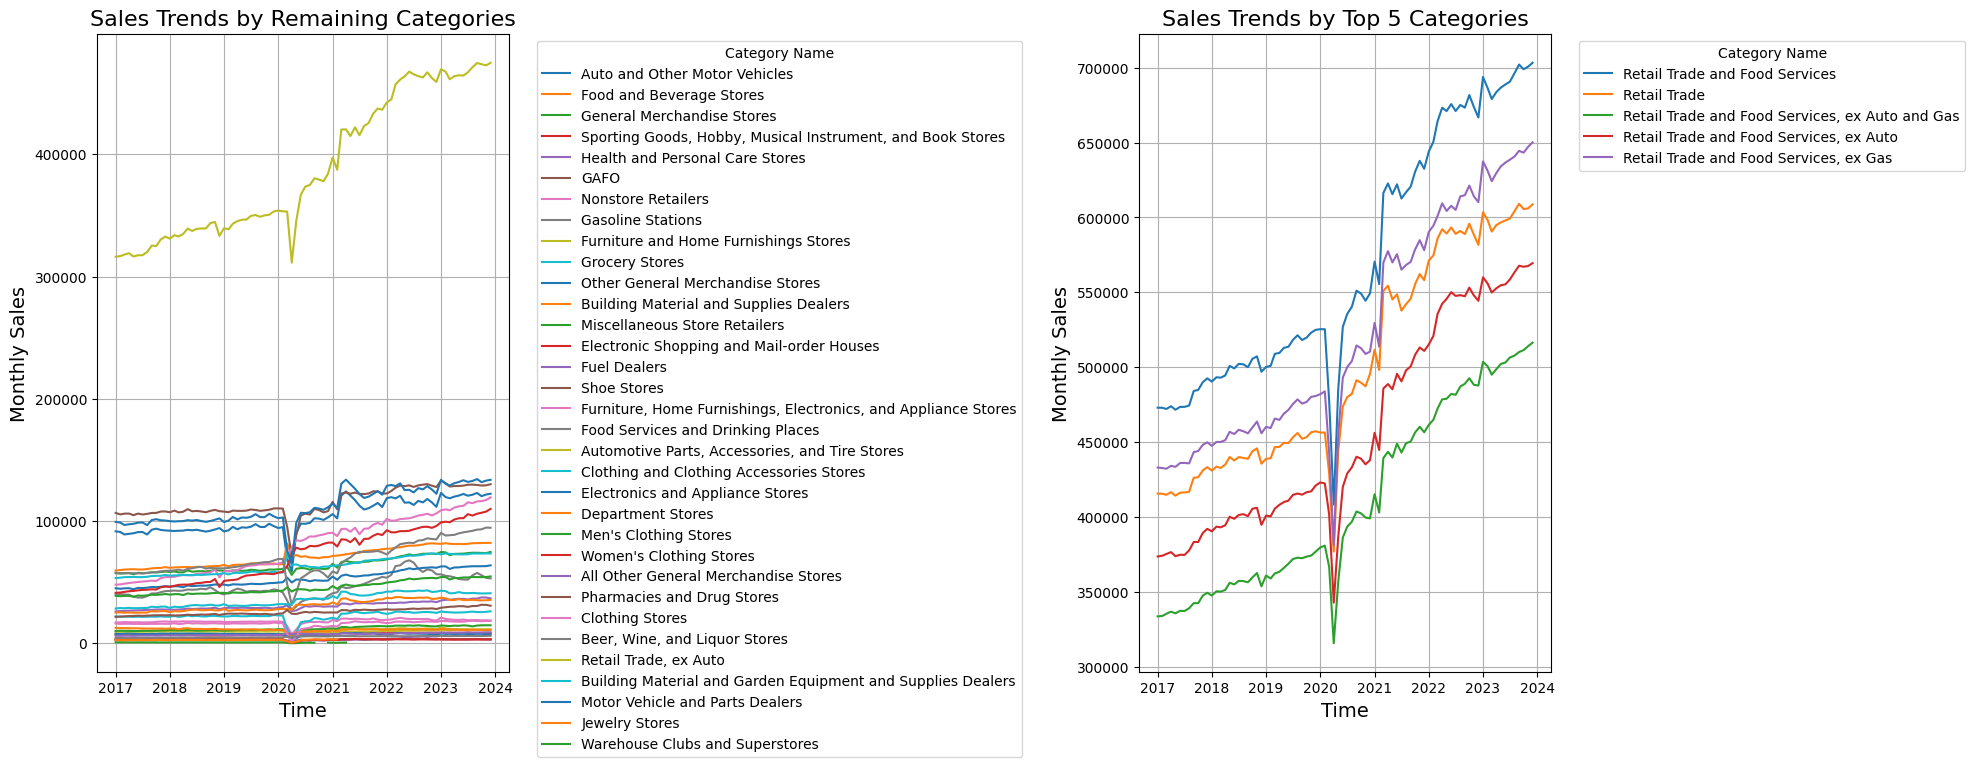

In [26]:
remaining_categories = sales_avg[~sales_avg['category_name'].isin(top_categories)]['category_name']
sales_trends_remaining = sales_trends[sales_trends['category_name'].isin(remaining_categories)]
plt.figure(figsize=(20, 8))

# Categories excluding the top 5
plt.subplot(1, 2, 1)
for category in sales_trends_remaining['category_name'].unique():
    category_data = sales_trends_remaining[sales_trends_remaining['category_name'] == category]
    plt.plot(category_data['time'], category_data['monthly_sales'], label=category)

plt.title('Sales Trends by Remaining Categories', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Monthly Sales', fontsize=14)
plt.legend(title='Category Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(visible=True)

# Top 5 categories
plt.subplot(1, 2, 2)
for category in sales_trends_top['category_name'].unique():
    category_data = sales_trends_top[sales_trends_top['category_name'] == category]
    plt.plot(category_data['time'], category_data['monthly_sales'], label=category)

plt.title('Sales Trends by Top 5 Categories', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Monthly Sales', fontsize=14)
plt.legend(title='Category Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(visible=True)

plt.tight_layout()
plt.show()


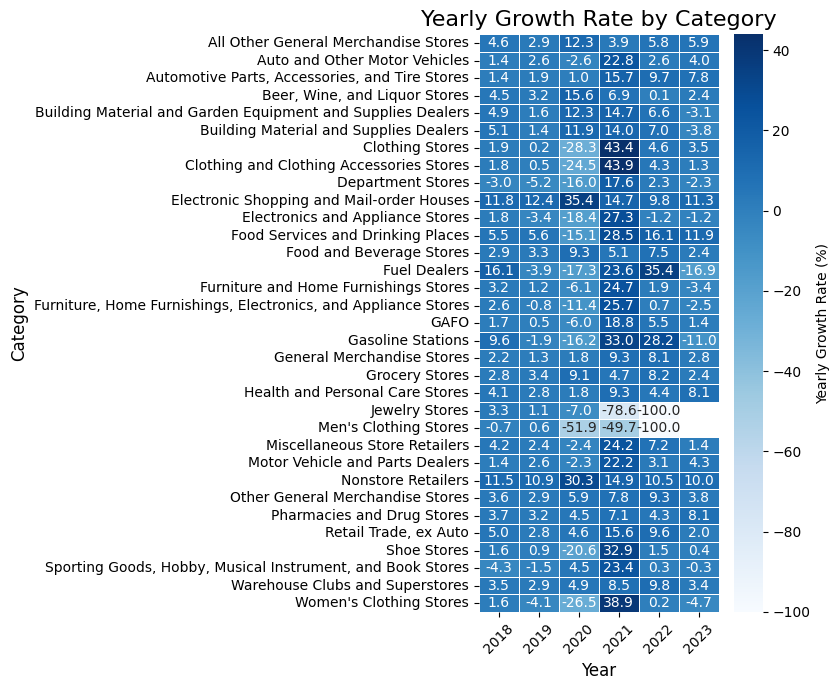

In [27]:
yearly_sales_excluding_top = yearly_sales_sum[yearly_sales_sum['category_name'].isin(remaining_categories)]

heatmap_data_excluding_top = yearly_sales_excluding_top.pivot(
    index='category_name', columns='year', values='yoy_percentage'
)
heatmap_data_excluding_top.drop(columns=2017, inplace=True)
plt.figure(figsize=(8, 7))
sns.heatmap(
    heatmap_data_excluding_top, 
    annot=True, 
    fmt=".1f", 
    cmap='Blues',
    cbar_kws={'label': 'Yearly Growth Rate (%)'}, 
    linewidths=0.5
)
plt.title("Yearly Growth Rate by Category", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [28]:
sm_df_not_adjusted

NameError: name 'sm_df_not_adjusted' is not defined

In [ ]:
pivoted_retail = sm_df_not_adjusted.pivot(index='time', columns='category_name', values='monthly_sales')['Retail Trade']
pivoted_food = sm_df_not_adjusted.pivot(index='time', columns='category_name', values='monthly_sales')['Food Services and Drinking Places']
pivoted_nonstore = sm_df_not_adjusted.pivot(index='time', columns='category_name', values='monthly_sales')['Nonstore Retailers']
pivoted_gasoline = sm_df_not_adjusted.pivot(index='time', columns='category_name', values='monthly_sales')['Gasoline Stations']
pivoted_clothing_and_acc = sm_df_not_adjusted.pivot(index='time', columns='category_name', values='monthly_sales')['Clothing and Accessories Stores']
pivoted_retail

In [ ]:
sns.set_style("whitegrid")

In [ ]:
retail_result = seasonal_decompose(pivoted_retail, model='multiplicative', period=12)
retail_result.plot()
plt.suptitle('Retail Trade - Seasonal Decomposition', fontsize=16, y=1.02)
plt.show()

In [ ]:
result_food = seasonal_decompose(pivoted_food, model='multiplicative', period=12)
result_nonstore = seasonal_decompose(pivoted_nonstore, model='multiplicative', period=12)
result_gasoline = seasonal_decompose(pivoted_gasoline, model='multiplicative', period=12)
result_clothing = seasonal_decompose(pivoted_clothing_and_acc, model='multiplicative', period=12)

fig, axes = plt.subplots(4, 4, figsize=(18, 14), gridspec_kw={'hspace': 0.8, 'wspace': 0.3})

def plot_components(result, axes, row, category_name):
    components = ['observed', 'trend', 'seasonal', 'resid']
    colors = [["#275aab","#3b67ad","#5876a6","#7c8ca6"],["#8f3bb3","#985bb3","#a873bf","#ac8aba"],["#14b316","#37b839","#67b868","#8fcf90"],["#d97c2b","#d48642","#e39a5b","#dea36f"]]
    for col, component in enumerate(components):
        axes[row, col].plot(getattr(result, component), color=colors[row][col], linewidth=2)
        axes[row, col].set_title(f'{category_name} - {component.capitalize()}', fontsize=12)
        axes[row, col].set_xlabel('Year', fontsize=10)
        axes[row, col].set_ylabel(component.capitalize(), fontsize=10)
        axes[row, col].tick_params(axis='x', rotation=45, labelsize=9)
        axes[row, col].tick_params(axis='y', labelsize=9)

plot_components(result_food, axes, 0, 'Food Services and Drinking Places')
plot_components(result_nonstore, axes, 1, 'Nonstore Retailers')
plot_components(result_gasoline, axes, 2, 'Gasoline Stations')
plot_components(result_clothing, axes, 3, 'Clothing and Accessories Stores')

plt.show()